In [1]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

import os
import tqdm
from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import pathlib
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.optimizers import Adam, RMSprop

In [2]:
# Importing Train and Test/Validation Set

train_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'training',
                                                      seed = 42, image_size = (299,299),
                                                      batch_size = 32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'validation',
                                                      seed = 42, image_size = (299,299),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [3]:
print("Train Shape", train_ds)

print("Test Shape", test_ds)

Train Shape <BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.int32)>
Test Shape <BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.int32)>


In [4]:
# Fix Class names removing number and -

import re

class_names = train_ds.class_names
print(class_names)
dog_names = [word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

print([i for i in range(len(dog_names)) if i % 2 == 1])

dog_names2 =[]
for i in range(len(dog_names)):
        if i % 2 == 1:
            dog_names2.append(dog_names[i])

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [5]:
dog_names2

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

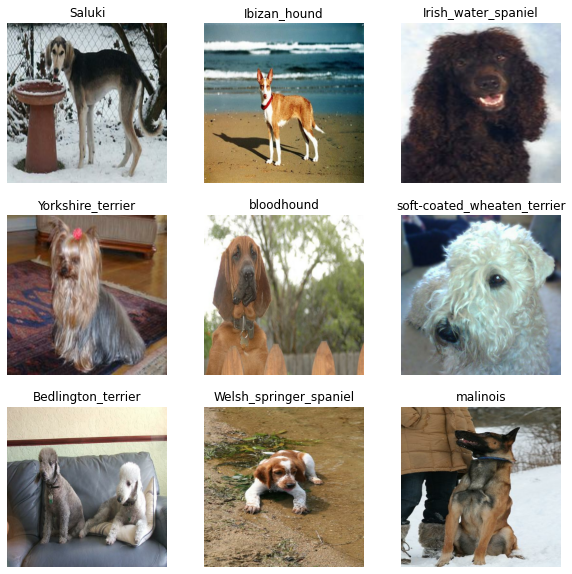

In [6]:
# Sample showing dog and dog name

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_names2[labels[i]])
    plt.axis("off")

In [7]:
pre_trained_model =  InceptionV3(weights = "imagenet", input_shape=(299,299,3), include_top= False)

for layer in pre_trained_model.layers:
    layer.trainable=False
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [9]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(299,
                                                                 299,
                                                                 3)),
        layers.experimental.preprocessing.RandomRotation(.4),
        layers.experimental.preprocessing.RandomWidth(.2),
        layers.experimental.preprocessing.RandomHeight(.2),
        layers.experimental.preprocessing.RandomZoom(.2),
    ]
)

In [13]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(299, 299, 3)))
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.3))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(dog_names2), activation = 'softmax'))

model.compile(optimizer = RMSprop(lr=0.001), loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)             

In [14]:
callbacks = myCallback()

epochs = 40

history = model.fit(
    train_ds,
    epochs = 40,
    validation_data = test_ds,
    callbacks = [callbacks]
)

Epoch 1/40
515/515 [==============================] - 830s 2s/step - loss: 3.2482 - accuracy: 0.2286 - val_loss: 1.2101 - val_accuracy: 0.6385
Epoch 2/40
515/515 [==============================] - 914s 2s/step - loss: 2.1752 - accuracy: 0.4284 - val_loss: 0.7372 - val_accuracy: 0.7728
Epoch 3/40
515/515 [==============================] - 960s 2s/step - loss: 2.0347 - accuracy: 0.4609 - val_loss: 0.6447 - val_accuracy: 0.8017
Epoch 4/40
515/515 [==============================] - 921s 2s/step - loss: 1.9928 - accuracy: 0.4838 - val_loss: 0.7132 - val_accuracy: 0.8054
Epoch 5/40
515/515 [==============================] - 889s 2s/step - loss: 1.9731 - accuracy: 0.4911 - val_loss: 0.7295 - val_accuracy: 0.7947
Epoch 6/40
515/515 [==============================] - 893s 2s/step - loss: 1.9936 - accuracy: 0.4877 - val_loss: 0.7040 - val_accuracy: 0.7971
Epoch 7/40
515/515 [==============================] - 875s 2s/step - loss: 2.0033 - accuracy: 0.4917 - val_loss: 0.8372 - val_accuracy: 0.7743

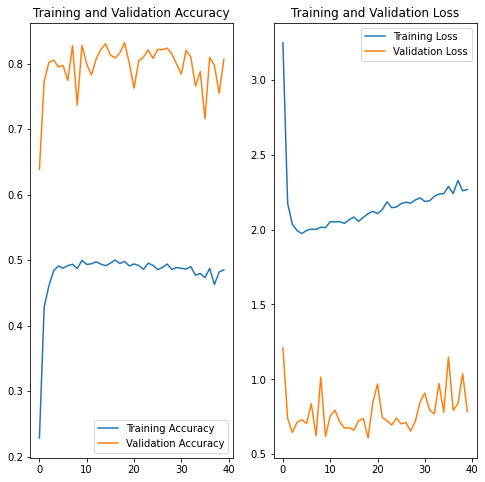

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

515/515 [==============================] - 656s 1s/step - loss: 0.6448 - accuracy: 0.8263

Training Score: [0.6448484659194946, 0.8263484239578247]
129/129 [==============================] - 165s 1s/step - loss: 0.7840 - accuracy: 0.8064

Test Score: [0.7839505076408386, 0.806365430355072]


In [19]:
img_path = ("Data/test.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

In [33]:
print(model.predict_classes(img_preprocessed))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[2]


In [34]:
np.argmax(model.predict(img_preprocessed), axis = - 1)

array([2], dtype=int64)

In [36]:
np.argmax(model.predict(img_preprocessed) > .5)

2

In [41]:
train_ds.class_names[2]

'n02085936-Maltese_dog'

In [42]:
img_path = ("Data/German_Shepherd.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

German_shepherd


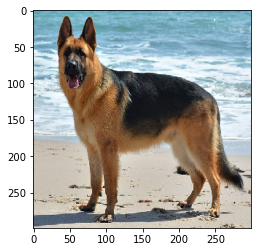

In [47]:
plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed) > .5)])

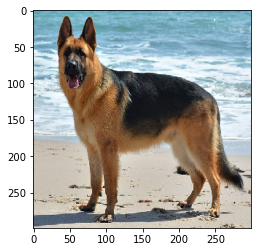

In [45]:
plt.imshow(img)

Border_collie


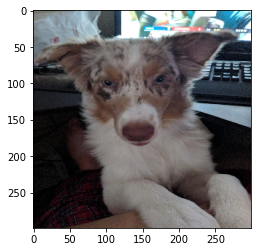

In [59]:
img_path = ("Data/IMG_20180916_133046.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

collie


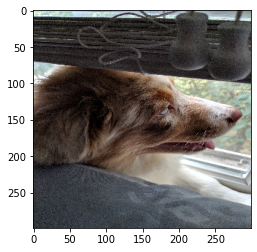

In [60]:
img_path = ("Data/MVIMG_20180706_171121.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

Border_collie


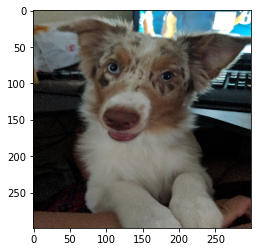

In [61]:
img_path = ("Data/MVIMG_20180916_133030.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

standard_poodle


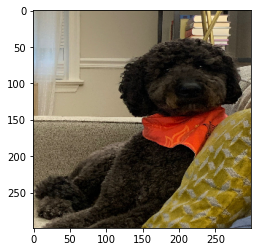

In [62]:
img_path = ("Data/Guillermo.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

Chihuahua


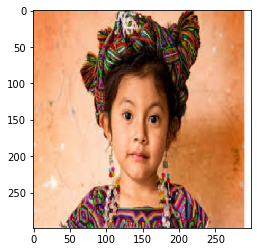

In [63]:
img_path = ("Data/girl.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

Bouvier_des_Flandres


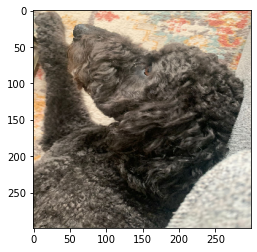

In [65]:
img_path = ("Data/Guillermo2.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

standard_poodle


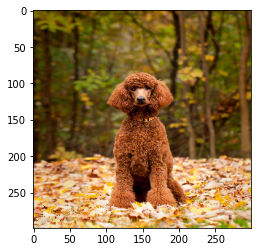

In [66]:
img_path = ("Data/Poodle.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)

print(dog_names2[np.argmax(model.predict(img_preprocessed))])

In [72]:
np.argmax(model.predict(img_preprocessed))

115